# Data Cleaning and EDA

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df_raw = pd.read_csv('OtoDom_data_01_october_rzeszow.csv',index_col=0)
df = df_raw.copy()

In [3]:
df.head()

title  \
0         Mieszkanie dwupokojowe ok.30m2 Podwisłocze   
1              Kawalerka 31,60m2 Nowe Miasto,zadbana   
2  66m2, po częściowym remoncie, super układ, bal...   
3   Mieszkanie 59 m2 oś.Kmity,super stan, wyposażone   
4                2 pokoje z balkonem, blisko Centrum   

                                                 URL  \
0  https://www.otodom.pl/pl/oferta/mieszkanie-dwu...   
1  https://www.otodom.pl/pl/oferta/kawalerka-31-6...   
2  https://www.otodom.pl/pl/oferta/66m2-po-czesci...   
3  https://www.otodom.pl/pl/oferta/mieszkanie-59-...   
4  https://www.otodom.pl/pl/oferta/2-pokoje-z-bal...   

                                 localization   surface       price    rent  \
0                        Rzeszów, Nowe Miasto  29,84 m²  245 000 zł  380 zł   
1                        Rzeszów, Nowe Miasto  31,60 m²  269 000 zł  365 zł   
2                          Rzeszów, Baranówka     66 m²  439 000 zł     NaN   
3                       Rzeszów, podkarpackie  58,80 m²  415 000 zł  580 zł   
4  Jacka Malczewskiego, Rzeszów, podkarpackie  40,30 m²  335 000 zł  360 zł   

  num_of_rooms building_material   heating floor  num_of_floors  market  \
0            2      wielka płyta  miejskie  > 10           11.0  wtórny   
1            1      wielka płyta  miejskie     5           10.0  wtórny   
2            3      wielka płyta  miejskie     9           10.0  wtórny   
3            3               NaN  miejskie     2            4.0  wtórny   
4            2      wielka płyta  miejskie     4            4.0  wtórny   

     year type_of_building        condition  
0  1975.0             blok       do remontu  
1  1980.0             blok  do zamieszkania  
2  1980.0              NaN  do zamieszkania  
3  1987.0             blok  do zamieszkania  
4  1977.0             blok  do zamieszkania

In [4]:
df.isnull().sum().sum()

9505

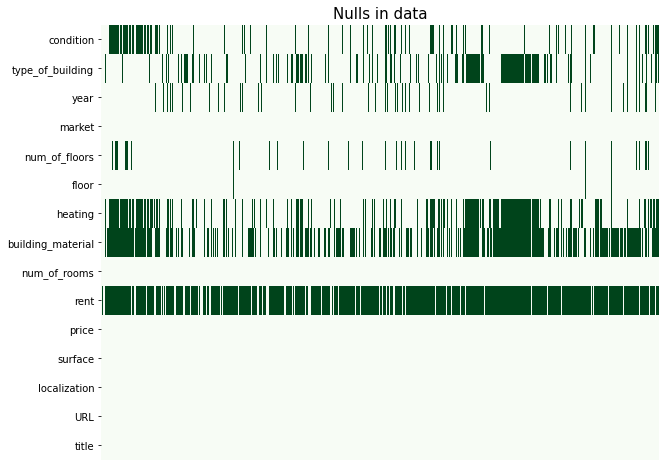

In [5]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(df.isnull().T,cmap='Greens',cbar=False,xticklabels=False)
ax.invert_yaxis()
plt.title('Nulls in data',size=15)
plt.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4027 entries, 0 to 4026
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              4027 non-null   object 
 1   URL                4027 non-null   object 
 2   localization       4027 non-null   object 
 3   surface            4026 non-null   object 
 4   price              4027 non-null   object 
 5   rent               531 non-null    object 
 6   num_of_rooms       4026 non-null   object 
 7   building_material  1675 non-null   object 
 8   heating            2671 non-null   object 
 9   floor              3991 non-null   object 
 10  num_of_floors      3815 non-null   float64
 11  market             4026 non-null   object 
 12  year               3736 non-null   float64
 13  type_of_building   3003 non-null   object 
 14  condition          3292 non-null   object 
dtypes: float64(2), object(13)
memory usage: 632.4+ KB


In [7]:
# removing advertisments without a price or those that dissapeared during webscraping
index_to_remove = df[(df.price == 'Zapytaj o cenę') | (df.price == 'Liczba ogłoszeń:16')].index

In [8]:
df = df.drop(index_to_remove)

In [9]:
df.head()

title  \
0         Mieszkanie dwupokojowe ok.30m2 Podwisłocze   
1              Kawalerka 31,60m2 Nowe Miasto,zadbana   
2  66m2, po częściowym remoncie, super układ, bal...   
3   Mieszkanie 59 m2 oś.Kmity,super stan, wyposażone   
4                2 pokoje z balkonem, blisko Centrum   

                                                 URL  \
0  https://www.otodom.pl/pl/oferta/mieszkanie-dwu...   
1  https://www.otodom.pl/pl/oferta/kawalerka-31-6...   
2  https://www.otodom.pl/pl/oferta/66m2-po-czesci...   
3  https://www.otodom.pl/pl/oferta/mieszkanie-59-...   
4  https://www.otodom.pl/pl/oferta/2-pokoje-z-bal...   

                                 localization   surface       price    rent  \
0                        Rzeszów, Nowe Miasto  29,84 m²  245 000 zł  380 zł   
1                        Rzeszów, Nowe Miasto  31,60 m²  269 000 zł  365 zł   
2                          Rzeszów, Baranówka     66 m²  439 000 zł     NaN   
3                       Rzeszów, podkarpackie  58,80 m²  415 000 zł  580 zł   
4  Jacka Malczewskiego, Rzeszów, podkarpackie  40,30 m²  335 000 zł  360 zł   

  num_of_rooms building_material   heating floor  num_of_floors  market  \
0            2      wielka płyta  miejskie  > 10           11.0  wtórny   
1            1      wielka płyta  miejskie     5           10.0  wtórny   
2            3      wielka płyta  miejskie     9           10.0  wtórny   
3            3               NaN  miejskie     2            4.0  wtórny   
4            2      wielka płyta  miejskie     4            4.0  wtórny   

     year type_of_building        condition  
0  1975.0             blok       do remontu  
1  1980.0             blok  do zamieszkania  
2  1980.0              NaN  do zamieszkania  
3  1987.0             blok  do zamieszkania  
4  1977.0             blok  do zamieszkania

In [10]:
len(df)

3466

In [11]:
# changing the numerical data from strings to float
df['price'] = df['price'].apply(lambda x: float(x.replace('zł','').replace(',','.').replace(' ','')))
df['surface'] = df['surface'].apply(lambda x: float(x.replace('m²','').replace(',','.')))
df['rent'][~df.rent.isnull()] = df['rent'][~df.rent.isnull()].apply(lambda x: float(x.replace('zł','').replace(',','.').replace(' ','')))
df['rent'] = df['rent'].astype('float')
df['num_of_rooms'] = df['num_of_rooms'].apply(lambda x: float(x.replace('więcej niż 10','11')))

/tmp/ipykernel_411787/308051561.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rent'][~df.rent.isnull()] = df['rent'][~df.rent.isnull()].apply(lambda x: float(x.replace('zł','').replace(',','.').replace(' ','')))


In [12]:
size_list = []
for flat in df.surface:
    if flat<30:
        size_list.append('small')
    elif flat >=30 and flat<60:
        size_list.append('average')
    elif flat >=60 and flat<85:
        size_list.append('big')
    else:
        size_list.append('very big')
df['size_of_flat'] = size_list

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3466 entries, 0 to 4026
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3466 non-null   object 
 1   URL                3466 non-null   object 
 2   localization       3466 non-null   object 
 3   surface            3466 non-null   float64
 4   price              3466 non-null   float64
 5   rent               531 non-null    float64
 6   num_of_rooms       3466 non-null   float64
 7   building_material  1670 non-null   object 
 8   heating            2526 non-null   object 
 9   floor              3431 non-null   object 
 10  num_of_floors      3255 non-null   float64
 11  market             3466 non-null   object 
 12  year               3176 non-null   float64
 13  type_of_building   2858 non-null   object 
 14  condition          2732 non-null   object 
 15  size_of_flat       3466 non-null   object 
dtypes: float64(6), object(10

In [14]:
px.scatter(data_frame=df[(df.price < 1000000)&(df.surface <125)], x='surface',y='price',color='num_of_rooms',trendline='ols')

In [15]:
fig = px.box(data_frame=df, x='size_of_flat',y='price',color='market')
fig.update_layout(yaxis_range=[0,1500000])
fig.show()

In [16]:
# making list with floor,count of elements, mean price and mean surface
list_floor = [[x,len(df[df.floor == x]),df['price'][df.floor == x].mean(),df['surface'][df.floor == x].mean()] for x in df['floor'][~df.floor.isnull()].unique()]

In [17]:
floor_price = pd.DataFrame()
floor_price = pd.DataFrame(list_floor,columns=['Floor','Count','Price','Surface']).sort_values(by='Price')

In [18]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Table(header=dict(values=floor_price.columns),
                     cells=dict(values=[floor_price.Floor,floor_price.Count,floor_price.Price,floor_price.Surface],
                     fill_color='lightblue'))])
fig.show()

In [19]:
df.type_of_building[df.floor == '> 10'].value_counts()

apartamentowiec    60
blok               37
Name: type_of_building, dtype: int64

In [20]:
fig = px.box(data_frame=df,x='type_of_building',y='price')
fig.update_layout(yaxis_range=[0,1500000])
fig.show()

In [21]:
px.histogram(data_frame=df,x='price',nbins=100)

In [22]:
df.corr()['price'].sort_values()

year            -0.001145
rent             0.191085
num_of_floors    0.224343
num_of_rooms     0.520976
surface          0.750547
price            1.000000
Name: price, dtype: float64

In [23]:
df.reset_index(inplace=True,drop=True)

In [24]:
# changing data form to use geopy for localization
records = []
for record in df.localization:
    if record.rfind('ul') > -1:
        if record.rfind('ul') == 0:
            records.append(('Rzeszów, ' + record[record.rfind('ul.'):record.find(',')]))
        elif record.rfind('ul') > 0:
            records.append(('Rzeszów, ' + record[record.rfind('ul.')::]))
    else:
        records.append(record)
df['localization'] = records

In [25]:
# Changing names of streets to avoid errors with geocoding
df.localization = df.localization.apply(lambda x: x.replace('ul. Kwiatkowskiego','Kwiatkowskiego Eugeniusza').replace('ul. Fryderyka Chopina','Fryderyka Szopena').replace('Kwiatkowskiego','Kwiatkowskiego Eugeniusza').replace('Zalesie, Rzeszów','Zalesie, 35-604 Rzeszów').replace('Graniczna, Rzeszów','Graniczna,35-326 Rzeszów').replace('Rzeszów, Zalesie','Zalesie, 35-604 Rzeszów'))

In [26]:
from geopy.geocoders import Nominatim
import math

In [27]:
def calculate_distance(origin, destination):
 
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km
 
    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c
 
    return d

Code: https://pastebin.com/jWU3ES9n

In [28]:
# Choosing the townhall in Rzeszow as the point
townhall_coordinates = (50.03743030742845, 22.004959171771347)

In [29]:
# calculating distance between townhall and propeties to check if it's correlated with the target
distance = []
counter = 0
for record in df.localization:
    try:
        if record != 'Rzeszów, podkarpackie':
            distance.append(calculate_distance(Nominatim(user_agent='Tobi').geocode(record)[1],townhall_coordinates))
        else:
            distance.append(np.nan)
    except:
        distance.append(np.nan)
    counter +=1

In [30]:
df['distance'] = distance

In [31]:
# adding the column with length of title advertisment to check if it's related with target (better described titles etc.)
df['title_len'] = df.title.apply(lambda x: len(x))

In [32]:
# Removing the propeties which were wrongly recognized by geopy
outliers = df[df.distance >11].index.to_list()
df.drop(index=outliers,inplace=True)
df[df['distance'].notna()].reset_index(drop=True)

title  \
0            Mieszkanie dwupokojowe ok.30m2 Podwisłocze   
1                 Kawalerka 31,60m2 Nowe Miasto,zadbana   
2     66m2, po częściowym remoncie, super układ, bal...   
3                   2 pokoje z balkonem, blisko Centrum   
4                   Szeregówka Od Dewelopera DO ODBIORU   
...                                                 ...   
2505  Inteligentne mieszkanie, 3 pokoje, 60 m2 - NOW...   
2506  inteligentne mieszkanie 60 m2 z tarasem, 3 pok...   
2507                     Nowy etap Bella Dolina 73,14m2   
2508                    Dwupoziomowe, 4 pokoje, balkon!   
2509        Rzeszów, mieszkanie na wynajem, Podwisłocze   

                                                    URL  \
0     https://www.otodom.pl/pl/oferta/mieszkanie-dwu...   
1     https://www.otodom.pl/pl/oferta/kawalerka-31-6...   
2     https://www.otodom.pl/pl/oferta/66m2-po-czesci...   
3     https://www.otodom.pl/pl/oferta/2-pokoje-z-bal...   
4     https://www.otodom.pl/pl/oferta/szeregowka-od-...   
...                                                 ...   
2505  https://www.otodom.pl/pl/oferta/inteligentne-m...   
2506  https://www.otodom.pl/pl/oferta/inteligentne-m...   
2507  https://www.otodom.pl/pl/oferta/nowy-etap-bell...   
2508  https://www.otodom.pl/pl/oferta/dwupoziomowe-4...   
2509  https://www.otodom.pl/pl/oferta/rzeszow-mieszk...   

                                    localization  surface     price   rent  \
0                           Rzeszów, Nowe Miasto    29.84  245000.0  380.0   
1                           Rzeszów, Nowe Miasto    31.60  269000.0  365.0   
2                             Rzeszów, Baranówka    66.00  439000.0    NaN   
3     Jacka Malczewskiego, Rzeszów, podkarpackie    40.30  335000.0  360.0   
4                           Rzeszów, ul. Porąbki   117.49  510000.0    NaN   
...                                          ...      ...       ...    ...   
2505                      Rzeszów, ul. Strażacka    60.00  408000.0    NaN   
2506                      Rzeszów, ul. Strażacka    62.29  417343.0    NaN   
2507                       Rzeszów, Staromieście    73.14  424200.0    NaN   
2508                        Rzeszów, Drabinianka    69.44  455000.0  800.0   
2509                        Rzeszów, Nowe Miasto    68.50  375000.0    NaN   

      num_of_rooms building_material    heating floor  num_of_floors  \
0              2.0      wielka płyta   miejskie  > 10           11.0   
1              1.0      wielka płyta   miejskie     5           10.0   
2              3.0      wielka płyta   miejskie     9           10.0   
3              2.0      wielka płyta   miejskie     4            4.0   
4              4.0            pustak     gazowe     1            2.0   
...            ...               ...        ...   ...            ...   
2505           3.0            pustak  kotłownia     1            4.0   
2506           3.0               NaN        NaN     1            4.0   
2507           4.0               NaN        NaN     7            8.0   
2508           4.0               NaN   miejskie     4            6.0   
2509           4.0               NaN        NaN     4           11.0   

         market    year type_of_building        condition size_of_flat  \
0        wtórny  1975.0             blok       do remontu        small   
1        wtórny  1980.0             blok  do zamieszkania      average   
2        wtórny  1980.0              NaN  do zamieszkania          big   
3        wtórny  1977.0             blok  do zamieszkania      average   
4     pierwotny  2019.0      szeregowiec   do wykończenia     very big   
...         ...     ...              ...              ...          ...   
2505  pierwotny  2019.0             blok   do wykończenia          big   
2506  pierwotny     NaN             blok              NaN          big   
2507  pierwotny  2022.0              NaN              NaN          big   
2508     wtórny     NaN             blok  do zamieszkania          big   
2509     wtórny 

In [33]:
px.scatter(data_frame=df,x='distance',y='price', trendline='ols')

In [34]:
df.isnull().sum()

title                   0
URL                     0
localization            0
surface                 0
price                   0
rent                 2917
num_of_rooms            0
building_material    1790
heating               938
floor                  34
num_of_floors         209
market                  0
year                  287
type_of_building      600
condition             731
size_of_flat            0
distance              936
title_len               0
dtype: int64

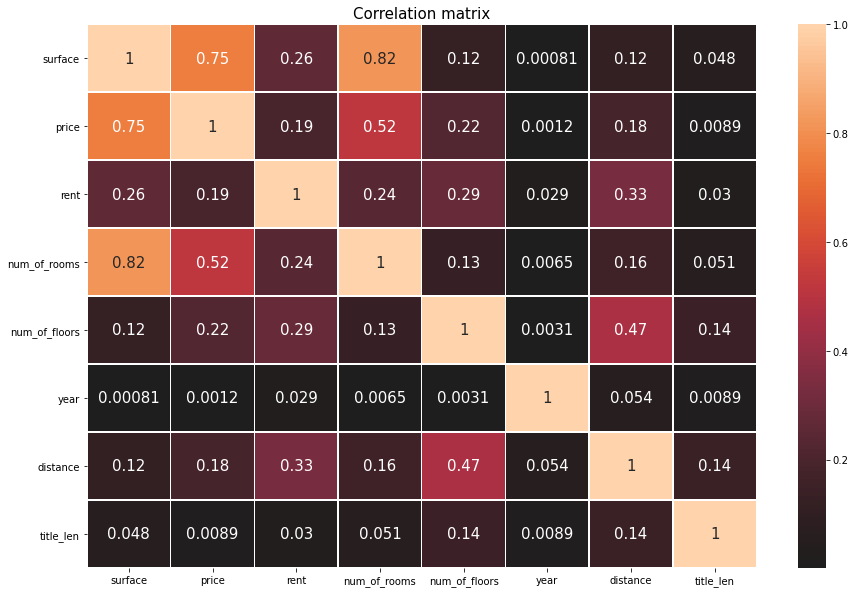

In [35]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr().abs(),annot=True,
            linewidths=0.5,annot_kws={'size':15},center=0)
plt.title('Correlation matrix',size=15)
plt.show()

In [36]:
# Delating columns with many nulls or not important to model
df_clear = df.drop(columns=['rent','title','URL','localization','building_material','year'])

In [37]:
def replace_non_number(row):
    if(row['floor'] == '> 10'):
        if(row['num_of_floors'] < 20):
            return 15
        elif(row['num_of_floors']>= 20):
            return 25
        else:
            return 11
    if (row['floor'] == 'parter'):
        return 0
    else:
        return row['floor']
df_clear['floor'] = df.apply(lambda row: replace_non_number(row),axis=1)

In [38]:
df_clear.count()

surface             3446
price               3446
num_of_rooms        3446
heating             2508
floor               3412
num_of_floors       3237
market              3446
type_of_building    2846
condition           2715
size_of_flat        3446
distance            2510
title_len           3446
dtype: int64

In [39]:
#Delating records with nan
df_clear.dropna(inplace=True)
df_clear.reset_index(drop=True,inplace=True)

In [40]:
df_clear.count()

surface             1392
price               1392
num_of_rooms        1392
heating             1392
floor               1392
num_of_floors       1392
market              1392
type_of_building    1392
condition           1392
size_of_flat        1392
distance            1392
title_len           1392
dtype: int64

# Encoding and Preparing for Modelling

In [41]:
df_clear['market'] = df_clear['market'].apply(lambda row: 0 if row == 'wtórny' else 1)
one_hot_df = pd.get_dummies(df_clear, columns=['heating','type_of_building','condition','size_of_flat'])

In [42]:
one_hot_df['floor'] = df_clear.floor.astype('float')

In [43]:
corr = one_hot_df.corr()['price'].abs().sort_values(ascending=False)
print(corr)

price                                1.000000
surface                              0.734267
size_of_flat_very big                0.528707
num_of_rooms                         0.469491
type_of_building_apartamentowiec     0.435844
num_of_floors                        0.416057
floor                                0.414823
size_of_flat_average                 0.410701
type_of_building_blok                0.342302
distance                             0.234650
size_of_flat_big                     0.170816
size_of_flat_small                   0.153521
title_len                            0.121437
heating_miejskie                     0.120595
heating_gazowe                       0.082436
condition_do remontu                 0.064339
heating_inne                         0.057012
condition_do zamieszkania            0.047427
heating_kotłownia                    0.040020
heating_elektryczne                  0.037035
type_of_building_dom wolnostojący    0.032646
condition_do wykończenia          

In [44]:
one_hot_df = one_hot_df.loc[:, corr.index.tolist()]

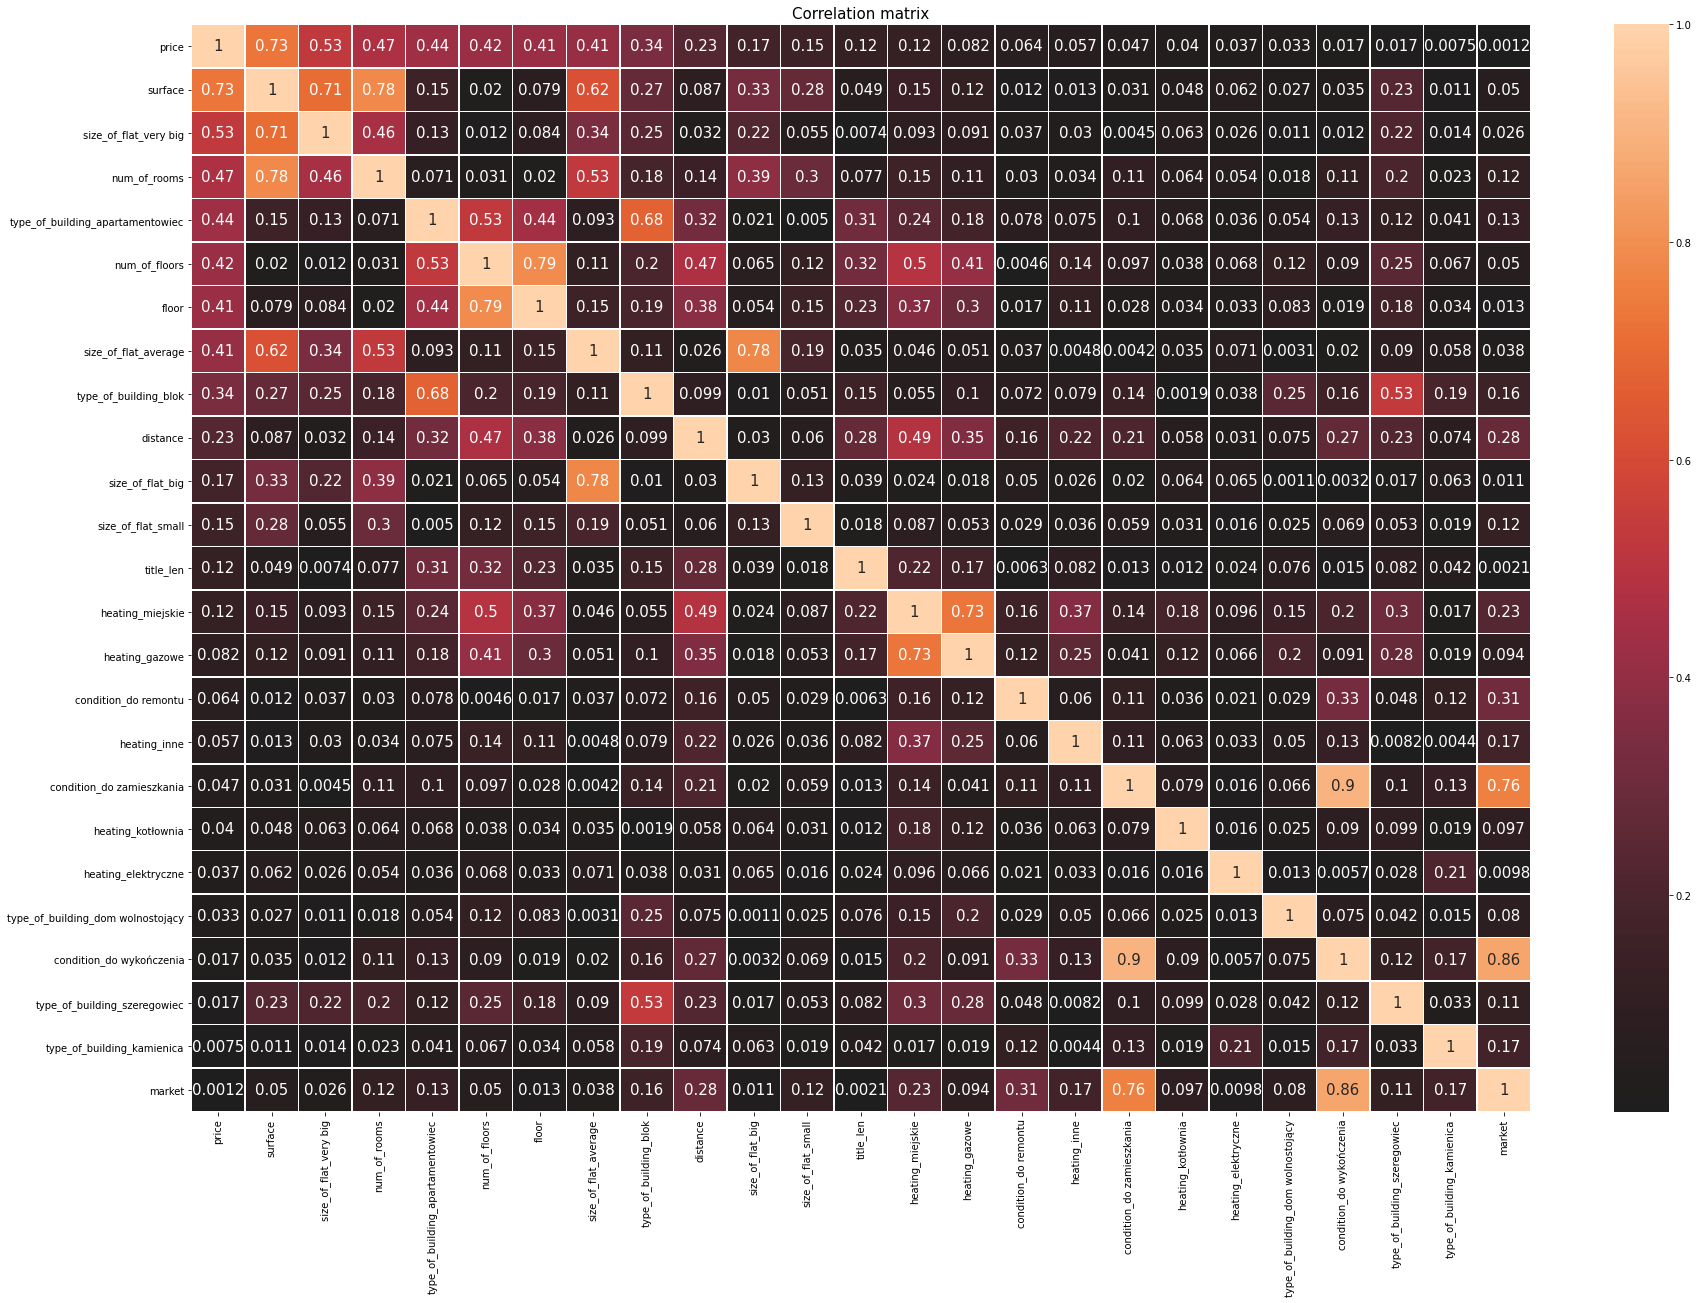

In [45]:
plt.figure(figsize=(30,20))
sns.heatmap(one_hot_df.corr().abs(),annot=True,
            linewidths=0.5,annot_kws={'size':15},center=0)
plt.title('Correlation matrix',size=15)
plt.show()

In [46]:
px.histogram(data_frame=one_hot_df,x='price', nbins=40)

In [47]:
one_hot_df_raw = one_hot_df.copy()

In [48]:
# function  which return index of outliers. Based on normal distribution and 68–95–99.7 rule
def rm_sigma(dataframe,col_name='Cena',sigma=2):
    low_bound = dataframe[col_name].mean() - (dataframe[col_name].std() * sigma)
    up_bound = dataframe[col_name].mean() + (dataframe[col_name].std() * sigma)
    outliers = dataframe[(dataframe[col_name] > up_bound) | (dataframe[col_name] < low_bound)].index
    return outliers

In [49]:
outliers = rm_sigma(one_hot_df, col_name='price', sigma=2)
outliers

Int64Index([   4,   34,  109,  116,  203,  206,  250,  271,  272,  273,  274,
             362,  528,  596,  718,  870,  871,  872,  989, 1113, 1115, 1116,
            1207, 1209, 1210, 1231, 1249, 1250, 1251, 1252, 1253, 1254, 1342,
            1344, 1356, 1357, 1358, 1361],
           dtype='int64')

In [50]:
# removing outliers from data
one_hot_df.drop(index=outliers,inplace=True)

In [51]:
one_hot_df

price  surface  size_of_flat_very big  num_of_rooms  \
0     245000.0    29.84                      0           2.0   
1     269000.0    31.60                      0           1.0   
2     335000.0    40.30                      0           2.0   
3     510000.0   117.49                      1           4.0   
5     379905.0    39.99                      0           2.0   
...        ...      ...                    ...           ...   
1387  557496.0    77.43                      0           3.0   
1388  690000.0   100.73                      1           3.0   
1389  376282.0    67.83                      0           4.0   
1390  408000.0    60.00                      0           3.0   
1391  455000.0    69.44                      0           4.0   

      type_of_building_apartamentowiec  num_of_floors  floor  \
0                                    0           11.0   15.0   
1                                    0           10.0    5.0   
2                                    0            4.0    4.0   
3                                    0            2.0    1.0   
5                                    0           12.0    7.0   
...                                ...            ...    ...   
1387                                 0            4.0    4.0   
1388                                 0            2.0    2.0   
1389                                 0            8.0    0.0   
1390                                 0            4.0    1.0   
1391                                 0            6.0    4.0   

      size_of_flat_average  type_of_building_blok  distance  ...  \
0                        0                      1  1.596029  ...   
1                        1                      1  1.596029  ...   
2                        1                      1  1.918445  ...   
3                        0                      0  7.821152  ...   
5                        1                      1  3.421427  ...   
...                    ...                    ...       ...  ...   
1387                     0                      1  3.844709  ...   
1388                     0                      1  4.573052  ...   
1389                     0                      1  4.210588  ...   
1390                     0                      1  3.844709  ...   
1391                     0                      1  3.583380  ...   

      condition_do remontu  heating_inne  condition_do zamieszkania  \
0                        1             0                          0   
1                        0             0                          1   
2                        0             0                          1   
3                        0             0                          0   
5                        0             0                          0   
...                    ...           ...                        ...   
1387                     0             0                          0   
1388                     0             0                          1   
1389                     0             0                          0   
1390                     0             0                          0   
1391                     0             0                          1   

      heating_kotłownia  heating_elektryczne  \
0                     0                    0   
1                     0                    0   
2                     0                    0   
3                     0                    0   
5                     0                    0   
...                 ...                  ...   
1387                  1                    0   
1388                  0                    0   
1389                  0                    0   
1390                  1                    0   
1391                  0                    0   

      type_of_building_dom wolnostojący  condition_do wykończenia  \
0                                     0                         0   
1                                     0                         0   
2                

# Modelling

In [52]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error as mae, max_error as me, mean_squared_error as mse

target = one_hot_df['price']
data = one_hot_df.loc[:, one_hot_df.columns != 'price']

In [53]:
scale = StandardScaler()
data = scale.fit_transform(data)

In [54]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(data,target,test_size=0.25,random_state=500)

In [55]:
# function which give metrics for every model at the end of modelling
def model_measurement(titles,regressor_list):
    measurement_list = []
    for title,regressor in zip(titles,regressor_list):
        y_pred = regressor.predict(x_test)
        y_true = y_test
        measurement_list.append([title,mae(y_test,y_pred),mse(y_test,y_pred),
                                 np.sqrt(mse(y_test,y_pred)),me(y_test,y_pred)])
    return pd.DataFrame(measurement_list,columns=['regressor','mean_absolute_error','mean_squared_error',
                                       'root_mean_square_error','maximum_error'])

In [56]:
def plot_regression(title,y_true,y_pred):
    results = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})
    minn = results[['y_true','y_pred']].min().min()
    maxx = results[['y_true','y_pred']].max().max()
    
    fig = go.Figure(data=[go.Scatter(x=results['y_true'],y=results['y_pred'], mode='markers'),
                    go.Scatter(x=[minn,maxx],y=[minn,maxx])],
                    layout=go.Layout(showlegend=False,width=900,
                                    xaxis_title='y_true',
                                    yaxis_title='y_pred',
                                    title=title))
    fig.show()

In [57]:
titles = []
regressor_list = []

## 1. Linear Regression

In [58]:
LR_regressor = LinearRegression()
LR_regressor.fit(x_train,y_train)

LinearRegression()

In [59]:
# measurement
y_pred = LR_regressor.predict(x_test)
y_true = y_test
titles.append('Linear Regression')
regressor_list.append(LR_regressor)
np.sqrt(mse(y_test,y_pred))

55044.283983176465

In [60]:
plot_regression('Linear Regression',y_true,y_pred)

## 2. Decision Tree Regression

In [61]:
DT_regressor = DecisionTreeRegressor(random_state=600)
DT_regressor.fit(x_train,y_train)
y_pred = DT_regressor.predict(x_test)
y_true = y_test
np.sqrt(mse(y_test,y_pred))

60865.2703661501

In [62]:
from sklearn.model_selection import GridSearchCV

reggresor = DecisionTreeRegressor(random_state=600)

param_grid = {'max_depth': np.arange(1,55,3),
              'max_features': np.arange(3,len(x_train[0]),1)}

grid_search = GridSearchCV(reggresor, param_grid=param_grid,scoring='neg_mean_squared_error', cv=5)

In [63]:
grid_search.fit(x_train,y_train)

print(grid_search.score(x_test,y_test))
print(grid_search.best_params_)

-3330173860.774547
{'max_depth': 7, 'max_features': 17}


In [64]:
# model
DT_regressor = DecisionTreeRegressor(random_state=600,max_depth=7,max_features=17)
DT_regressor.fit(x_train,y_train)
# measurement
y_pred = DT_regressor.predict(x_test)
y_true = y_test
titles.append('Decision Tree Regressor')
regressor_list.append(DT_regressor)
np.sqrt(mse(y_test,y_pred))

57707.65859723081

In [65]:
plot_regression('Decision Tree Regressor',y_true,y_pred)

## 3. Random Forest Regression

In [66]:
# Random forest regressor
from sklearn.ensemble import RandomForestRegressor

In [67]:
Rtc_regressor = RandomForestRegressor(random_state=600)
Rtc_regressor.fit(x_train,y_train)
y_pred = Rtc_regressor.predict(x_test)
y_true = y_test
np.sqrt(mse(y_test,y_pred))

42016.9591581698

In [68]:
reggresor = RandomForestRegressor(random_state=600)

param_grid = {'max_depth': np.arange(1,55,3),
              'n_estimators': np.arange(2,106,3)}

grid_search = GridSearchCV(reggresor, param_grid=param_grid,scoring='neg_mean_squared_error', cv=5)

In [69]:
grid_search.fit(x_train,y_train)

print(grid_search.score(x_test,y_test))
print(grid_search.best_params_)

-1775458780.6794665
{'max_depth': 16, 'n_estimators': 104}


In [70]:
# model
Rtc_regressor = RandomForestRegressor(n_estimators=104,random_state=600,max_depth=16)
Rtc_regressor.fit(x_train,y_train)
# measurement
y_pred = Rtc_regressor.predict(x_test)
y_true = y_test
titles.append('Random Forest Regressor')
regressor_list.append(Rtc_regressor)
np.sqrt(mse(y_test,y_pred))

42136.193239060725

In [71]:
plot_regression('Random Forest Regressor',y_true,y_pred)

## 4. XGBoost

In [72]:
import xgboost as xgb

xgb_regressor = xgb.XGBRegressor()
xgb_regressor.fit(x_train,y_train)
y_pred = xgb_regressor.predict(x_test)
y_true = y_test
np.sqrt(mse(y_test,y_pred))

40945.194841014556

In [73]:
reggresor = xgb.XGBRegressor(random_state=600)

param_grid = {'max_depth': np.arange(1,55,3),
              'n_estimators': np.arange(2,106,3)}

grid_search = GridSearchCV(reggresor, param_grid=param_grid,scoring='neg_mean_squared_error', cv=5)

In [74]:
grid_search.fit(x_train,y_train)

print(grid_search.score(x_test,y_test))
print(grid_search.best_params_)

-1851739951.4077115
{'max_depth': 7, 'n_estimators': 104}


In [75]:
xgb_regressor = xgb.XGBRegressor(random_state=600,max_depth=7, n_estimators=104)
xgb_regressor.fit(x_train,y_train)
y_pred = xgb_regressor.predict(x_test)
y_true = y_test
titles.append('XGBoost Regressor')
regressor_list.append(xgb_regressor)
np.sqrt(mse(y_test,y_pred))

43031.84810588213

In [76]:
plot_regression('XGBoost Regressor',y_true,y_pred)

## 5. SVR

In [77]:
from sklearn.svm import SVR

SVR_regressor = SVR(kernel='rbf', C=20000, gamma=0.05)
SVR_regressor.fit(x_train,y_train)
y_pred = SVR_regressor.predict(x_test)
y_true = y_test
np.sqrt(mse(y_test,y_pred))

58417.18918163439

In [78]:
reggresor = SVR()

param_grid = {'kernel': ['linear','rbf'],
              'C': np.arange(20000,1200001,100000)}

grid_search = GridSearchCV(reggresor, param_grid=param_grid,scoring='neg_mean_squared_error', cv=5)

In [79]:
grid_search.fit(x_train,y_train)

print(grid_search.score(x_test,y_test))
print(grid_search.best_params_)

-2699853526.5176635
{'C': 1020000, 'kernel': 'rbf'}


In [80]:
# model
SVR_regressor = SVR(kernel='rbf',C=1020000)
SVR_regressor.fit(x_train,y_train)
# measurement
y_pred = SVR_regressor.predict(x_test)
y_true = y_test
titles.append('SVR')
regressor_list.append(SVR_regressor)
np.sqrt(mse(y_test,y_pred))

51960.11476620951

In [81]:
plot_regression('SVR',y_true,y_pred)

## 6. Neural Network

In [90]:
import tensorflow as tf

# model creating
model = tf.keras.models.Sequential()

# input layer
model.add(tf.keras.layers.Dense(30, activation='relu', input_shape=(x_train.shape[1], )))
# hidden layers
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dropout(0.05))
model.add(tf.keras.layers.Dense(60, activation='relu'))
model.add(tf.keras.layers.Dropout(0.05))
model.add(tf.keras.layers.Dense(30, activation='relu'))
# output layer
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer='adam',loss='mean_absolute_percentage_error')

In [91]:
model.fit(x_train, y_train, epochs=200, verbose=1)

Epoch 1/200
32/32 [==============================] - 1s 2ms/step - loss: 99.9987
Epoch 2/200
32/32 [==============================] - 0s 1ms/step - loss: 99.9838
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 99.8579
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 99.1657
Epoch 5/200
32/32 [==============================] - 0s 1ms/step - loss: 96.5197
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 88.9205
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 70.7897
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 45.8652
Epoch 9/200
32/32 [==============================] - 0s 1ms/step - loss: 36.1243
Epoch 10/200
32/32 [==============================] - 0s 1ms/step - loss: 31.1784
Epoch 11/200
32/32 [==============================] - 0s 2ms/step - loss: 26.5622
Epoch 12/200
32/32 [==============================] - 0s 2ms/step - loss: 23.2828
Epoch 13/200
32/32 [=====

32/32 [==============================] - 0s 2ms/step - loss: 8.2062
Epoch 102/200
32/32 [==============================] - 0s 1ms/step - loss: 8.3653
Epoch 103/200
32/32 [==============================] - 0s 1ms/step - loss: 8.1426
Epoch 104/200
32/32 [==============================] - 0s 2ms/step - loss: 8.0986
Epoch 105/200
32/32 [==============================] - 0s 2ms/step - loss: 8.0584
Epoch 106/200
32/32 [==============================] - 0s 1ms/step - loss: 8.2425
Epoch 107/200
32/32 [==============================] - 0s 2ms/step - loss: 8.2818
Epoch 108/200
32/32 [==============================] - 0s 2ms/step - loss: 8.1894
Epoch 109/200
32/32 [==============================] - 0s 2ms/step - loss: 8.1268
Epoch 110/200
32/32 [==============================] - 0s 2ms/step - loss: 8.0727
Epoch 111/200
32/32 [==============================] - 0s 2ms/step - loss: 8.1488
Epoch 112/200
32/32 [==============================] - 0s 2ms/step - loss: 8.1820
Epoch 113/200
32/32 [=========

In [92]:
y_pred = model.predict(x_test)
y_true = y_test
titles.append('Neural Network')
regressor_list.append(model)
np.sqrt(mse(y_test,y_pred))

53591.76466961715

In [93]:
plot_regression('Neural Network',y_true,y_pred.reshape(339))

In [94]:
measurement_df = model_measurement(titles,regressor_list)

In [95]:
measurement_df

regressor  mean_absolute_error  mean_squared_error  \
0        Linear Regression         41271.539886        3.029873e+09   
1  Decision Tree Regressor         37737.066364        3.330174e+09   
2  Random Forest Regressor         26259.928100        1.775459e+09   
3        XGBoost Regressor         27371.288864        1.851740e+09   
4                      SVR         34256.974299        2.699854e+09   
5           Neural Network         35400.996875        2.876182e+09   
6           Neural Network         34645.289786        2.872077e+09   

   root_mean_square_error  maximum_error  
0            55044.283983  258370.916197  
1            57707.658597  287000.000000  
2            42136.193239  257698.099176  
3            43031.848106  174247.375000  
4            51960.114766  289466.251079  
5            53630.046987  295299.562500  
6            53591.764670  288314.000000

### The best results got Random Forest and XGBoost. In Random Forest, the prediction values differed on average by 42136.19 from the actual values. In XGBoost, the mean differance was 43031.84.

In [96]:
# Saving Random Forest Regressor
import pickle

pickle.dump(Rtc_regressor, open('tree_regr.sav', 'wb'))

In [97]:
# Loading model
clf_tree = pickle.load(open(r'tree_regr.sav', 'rb'))